In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.metrics import PrecisionRecallDisplay
from ipywidgets import interact
from sklearn.datasets import make_classification
import warnings
import optuna

In [61]:
df = pd.read_csv("lending_club_loan_dataset.csv")

In [62]:
df

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,NaN,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,NaN,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,NaN,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,NaN,47.4,0.0,0.822980,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [64]:
df.drop(["last_major_derog_none"],axis = 1, inplace = True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   grade               20000 non-null  object 
 2   annual_inc          20000 non-null  float64
 3   short_emp           20000 non-null  int64  
 4   emp_length_num      20000 non-null  int64  
 5   home_ownership      18509 non-null  object 
 6   dti                 19846 non-null  float64
 7   purpose             20000 non-null  object 
 8   term                20000 non-null  object 
 9   last_delinq_none    20000 non-null  int64  
 10  revol_util          20000 non-null  float64
 11  total_rec_late_fee  20000 non-null  float64
 12  od_ratio            20000 non-null  float64
 13  bad_loan            20000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.1+ MB


In [66]:
df["home_ownership"].value_counts()

MORTGAGE    9844
RENT        7052
OWN         1613
Name: home_ownership, dtype: int64

In [67]:
df.describe(include=[np.object])

,grade,home_ownership,purpose,term
count,20000,18509,20000,20000
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6042,9844,12337,14969


In [68]:
df['home_ownership'] = df['home_ownership'].fillna('MORTGAGE')


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   grade               20000 non-null  object 
 2   annual_inc          20000 non-null  float64
 3   short_emp           20000 non-null  int64  
 4   emp_length_num      20000 non-null  int64  
 5   home_ownership      20000 non-null  object 
 6   dti                 19846 non-null  float64
 7   purpose             20000 non-null  object 
 8   term                20000 non-null  object 
 9   last_delinq_none    20000 non-null  int64  
 10  revol_util          20000 non-null  float64
 11  total_rec_late_fee  20000 non-null  float64
 12  od_ratio            20000 non-null  float64
 13  bad_loan            20000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.1+ MB


<AxesSubplot:xlabel='dti', ylabel='home_ownership'>

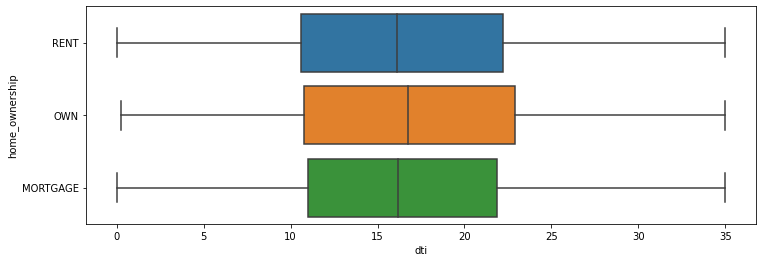

In [70]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df["dti"],y = df['home_ownership'])

In [71]:
np.mean(df["dti"])

16.58784137861536

In [72]:
df['dti'] = df['dti'].fillna(16)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   grade               20000 non-null  object 
 2   annual_inc          20000 non-null  float64
 3   short_emp           20000 non-null  int64  
 4   emp_length_num      20000 non-null  int64  
 5   home_ownership      20000 non-null  object 
 6   dti                 20000 non-null  float64
 7   purpose             20000 non-null  object 
 8   term                20000 non-null  object 
 9   last_delinq_none    20000 non-null  int64  
 10  revol_util          20000 non-null  float64
 11  total_rec_late_fee  20000 non-null  float64
 12  od_ratio            20000 non-null  float64
 13  bad_loan            20000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.1+ MB


***EDA***


<AxesSubplot:xlabel='bad_loan', ylabel='count'>

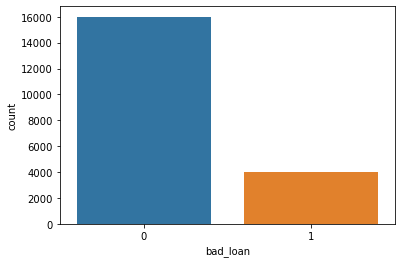

In [74]:
sns.countplot(df["bad_loan"])

(array([0, 1, 2]),
 [Text(0, 0, 'RENT'), Text(1, 0, 'OWN'), Text(2, 0, 'MORTGAGE')])

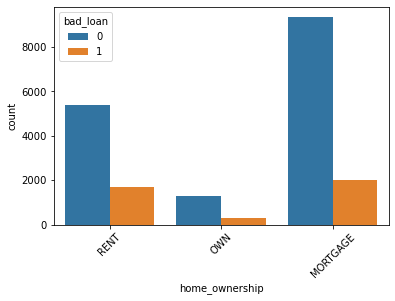

In [75]:
sns.countplot(df["home_ownership"], hue = df["bad_loan"])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'medical'),
  Text(3, 0, 'other'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'small_business'),
  Text(6, 0, 'major_purchase'),
  Text(7, 0, 'vacation'),
  Text(8, 0, 'car'),
  Text(9, 0, 'house'),
  Text(10, 0, 'moving'),
  Text(11, 0, 'wedding')])

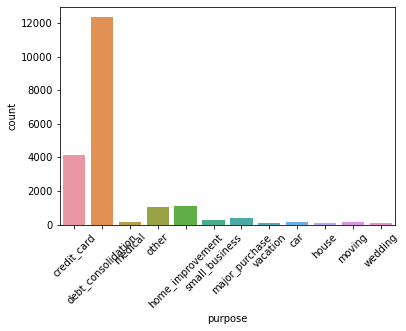

In [76]:
sns.countplot(df["purpose"])
plt.xticks(rotation=45)

In [77]:
df['term'] = df['term'].apply(lambda x: x.lower())

In [78]:
df['term'].value_counts()

 36 months    15001
 60 months     4999
Name: term, dtype: int64

(array([0, 1]), [Text(0, 0, ' 36 months'), Text(1, 0, ' 60 months')])

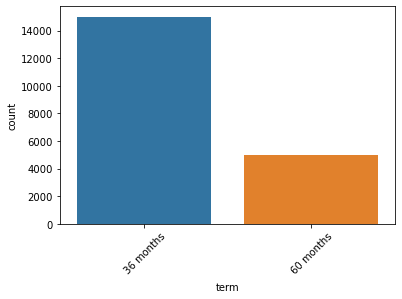

In [79]:
sns.countplot(df["term"])
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, ' 36 months'), Text(1, 0, ' 60 months')])

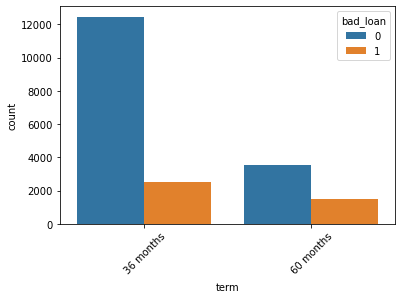

In [80]:
sns.countplot(df["term"], hue = df["bad_loan"])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

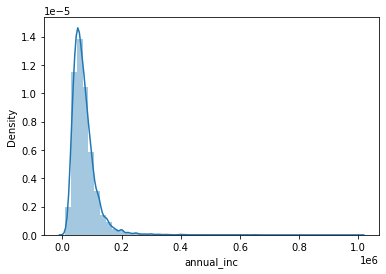

In [81]:
sns.distplot(df["annual_inc"])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'D'),
  Text(2, 0, 'E'),
  Text(3, 0, 'B'),
  Text(4, 0, 'G'),
  Text(5, 0, 'C'),
  Text(6, 0, 'F')])

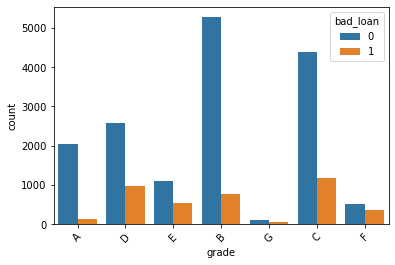

In [82]:
sns.countplot(df["grade"], hue = df["bad_loan"])
plt.xticks(rotation=45)

In [83]:
df

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,47.4,0.0,0.822980,0


In [84]:
df.to_csv("loan_project.csv")

In [85]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [86]:
label_encoder = preprocessing.LabelEncoder()
df['home_ownership']= label_encoder.fit_transform(df['home_ownership'])
df['home_ownership'].unique()

array([2, 1, 0])

In [87]:
df['purpose'].unique()

array(['credit_card', 'debt_consolidation', 'medical', 'other',
       'home_improvement', 'small_business', 'major_purchase', 'vacation',
       'car', 'house', 'moving', 'wedding'], dtype=object)

In [88]:
label_encoder = preprocessing.LabelEncoder()
df['purpose']= label_encoder.fit_transform(df['purpose'])
df['purpose'].unique()

array([ 1,  2,  6,  8,  3,  9,  5, 10,  0,  4,  7, 11])

In [89]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [90]:
label_encoder = preprocessing.LabelEncoder()
df['term']= label_encoder.fit_transform(df['term'])
df['term'].unique()


array([0, 1])

In [91]:
df['grade'].unique()

array(['A', 'D', 'E', 'B', 'G', 'C', 'F'], dtype=object)

In [92]:
label_encoder = preprocessing.LabelEncoder()
df['grade']= label_encoder.fit_transform(df['grade'])
df['grade'].unique()


array([0, 3, 4, 1, 6, 2, 5])

In [93]:
df.drop(["id"],axis = 1, inplace = True)

In [94]:
df

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,0,100000.0,1,1,2,26.27,1,0,1,43.2,0.0,0.160624,0
1,0,83000.0,0,4,1,5.39,1,0,0,21.5,0.0,0.810777,0
2,3,78000.0,0,11,0,18.45,2,1,1,46.3,0.0,0.035147,1
3,3,37536.0,0,6,0,12.28,6,1,0,10.7,0.0,0.534887,1
4,3,65000.0,0,11,0,11.26,2,0,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,27000.0,0,9,2,18.36,2,0,1,46.5,0.0,0.821782,1
19996,1,45000.0,0,2,0,23.22,5,0,0,46.2,0.0,0.652200,0
19997,1,104000.0,0,5,0,13.27,2,0,1,78.5,0.0,0.482555,0
19998,0,38400.0,0,2,0,12.84,2,0,0,47.4,0.0,0.822980,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   grade               20000 non-null  int32  
 1   annual_inc          20000 non-null  float64
 2   short_emp           20000 non-null  int64  
 3   emp_length_num      20000 non-null  int64  
 4   home_ownership      20000 non-null  int32  
 5   dti                 20000 non-null  float64
 6   purpose             20000 non-null  int32  
 7   term                20000 non-null  int32  
 8   last_delinq_none    20000 non-null  int64  
 9   revol_util          20000 non-null  float64
 10  total_rec_late_fee  20000 non-null  float64
 11  od_ratio            20000 non-null  float64
 12  bad_loan            20000 non-null  int64  
dtypes: float64(5), int32(4), int64(4)
memory usage: 1.7 MB


***modelling***


In [96]:
#RANDOM FOREST

In [97]:
x = df.drop('bad_loan',axis = 1)
y = df.bad_loan

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [99]:
def objective(trial,x_train,y_train):
    ## getting the parameters
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    n_estimator = trial.suggest_int('n_estimators',50,1000,10)
    majority = trial.suggest_float('majority',0,1)
    minority = trial.suggest_float('minority',1,10)
    class_weight = {1:minority,0:majority}
    model = RandomForestClassifier(
            max_depth=max_depth, n_estimators=n_estimator,class_weight=class_weight)
    score = cross_val_score(model, x_train, y_train, n_jobs=-1, cv=3,scoring='roc_auc')
    ap = score.mean()
    return ap

In [100]:
study = optuna.create_study(direction="maximize", study_name="credit_risk_model")
func = lambda trial: objective(trial, x_train, y_train)
study.optimize(func, n_trials=5)

[I 2022-04-28 18:24:52,585] A new study created in memory with name: credit_risk_model
[I 2022-04-28 18:25:16,983] Trial 0 finished with value: 0.6665032661406548 and parameters: {'max_depth': 23, 'n_estimators': 480, 'majority': 0.14498715998468448, 'minority': 2.8230122085451543}. Best is trial 0 with value: 0.6665032661406548.
[I 2022-04-28 18:25:35,287] Trial 1 finished with value: 0.6708607211264304 and parameters: {'max_depth': 12, 'n_estimators': 510, 'majority': 0.9571223179944419, 'minority': 9.335692077999441}. Best is trial 1 with value: 0.6708607211264304.
[I 2022-04-28 18:25:39,041] Trial 2 finished with value: 0.6887919574443332 and parameters: {'max_depth': 2, 'n_estimators': 330, 'majority': 0.17571311505183607, 'minority': 6.248548835263401}. Best is trial 2 with value: 0.6887919574443332.
[I 2022-04-28 18:26:08,556] Trial 3 finished with value: 0.664743053818075 and parameters: {'max_depth': 16, 'n_estimators': 770, 'majority': 0.6802342561311359, 'minority': 7.682147

In [101]:
study.best_params

{'max_depth': 2,
 'n_estimators': 350,
 'majority': 0.5867712069625183,
 'minority': 1.966779697122023}

In [102]:
model =RandomForestClassifier(n_estimators=110,max_depth=5,class_weight={1:1.5,0:0.76})
model.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.76, 1: 1.5}, max_depth=5,
                       n_estimators=110)

In [103]:
y_train.value_counts()

0    12802
1     3198
Name: bad_loan, dtype: int64

In [104]:
train_pred_score = model.predict_proba(x_train)[:,1]
test_pred_score = model.predict_proba(x_test)[:,1]

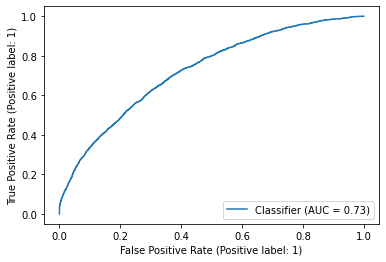

In [105]:
RocCurveDisplay.from_predictions(y_train,train_pred_score)

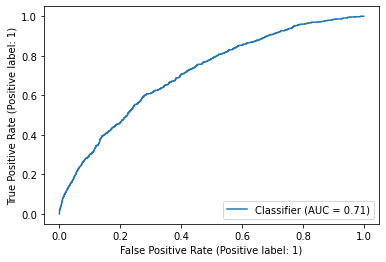

In [106]:
RocCurveDisplay.from_predictions(y_test,test_pred_score)

In [107]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [108]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     12802
           1       0.59      0.13      0.21      3198

    accuracy                           0.81     16000
   macro avg       0.70      0.55      0.55     16000
weighted avg       0.77      0.81      0.76     16000



In [109]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3198
           1       0.55      0.13      0.20       802

    accuracy                           0.80      4000
   macro avg       0.68      0.55      0.55      4000
weighted avg       0.76      0.80      0.75      4000



In [110]:
pd.DataFrame(zip(x.columns,model.feature_importances_),columns = ['Features','Importance']).sort_values(by='Importance',ascending=False).reset_index(drop=True)

,Features,Importance
0,grade,0.335045
1,annual_inc,0.160317
2,dti,0.134584
3,total_rec_late_fee,0.131970
4,term,0.096109
5,revol_util,0.061886
6,home_ownership,0.029420
7,od_ratio,0.017278
8,purpose,0.015313
9,emp_length_num,0.011507


In [112]:
model.predict([[1,0,10000,0,5,2,26,2,0.1,44,0,0.1]])

array([0], dtype=int64)

In [113]:
import pickle
 
pickle.dump(model, open('model_save', 'wb'))


In [117]:
lr = pickle.load(open('model_save', 'rb'))
 

In [118]:
lr.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)